In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas import Series, DataFrame
boston=datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
print(boston.data.shape)

(506, 13)


In [38]:
#print(boston.feature_names)
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
bos=pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['price']=boston.target #to add price column , since it is in target 
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [24]:
#to split the dataset for training purpose and testing purpose 
X = bos.drop('price', axis = 1)
Y = bos['price']
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,bos.price)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [32]:
#linear_regression
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred=regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% mean_squared_error(Y_test,Y_pred))

#R-Square 

Coefficients: 
 [-1.01099699e-01  4.48032500e-02  4.46124998e-02  2.82815645e+00
 -1.93931119e+01  4.40508315e+00  5.03895665e-04 -1.49641680e+00
  2.85772464e-01 -1.34077077e-02 -9.51925170e-01  9.39109379e-03
 -4.75175921e-01]
Mean squared error: 19.85


0.6868078402753626

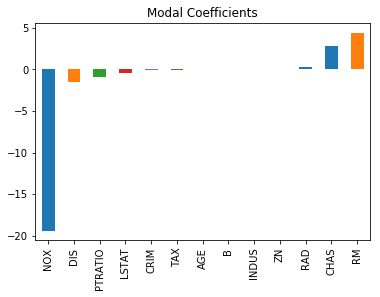

In [37]:
predictors = X_train.columns
coef = Series(regr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [53]:
#ridge_regression
regr1=linear_model.Ridge(alpha=0.05, normalize=True)
regr1.fit(X_train,Y_train)
Y_pred=regr1.predict(X_test)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"% mean_squared_error(Y_test,Y_pred))
print("r-square : %f " %regr1.score(X_test,Y_test) )

Coefficients: 
 [-8.50715281e-02  3.16839275e-02 -2.22937588e-02  2.98613983e+00
 -1.45304050e+01  4.51660583e+00 -2.54167412e-03 -1.22990733e+00
  1.65105289e-01 -7.40299276e-03 -8.97165655e-01  9.23789774e-03
 -4.45865841e-01]
Mean squared error: 19.91
r-square : 0.685817 


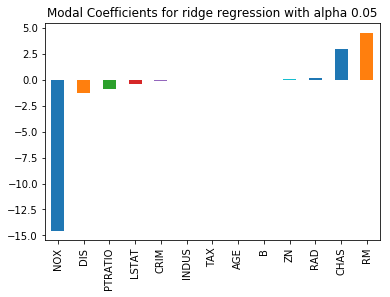

In [39]:
predictors = X_train.columns
coef = Series(regr1.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients for ridge regression with alpha 0.05')

Coefficients: 
 [-2.59377703e-02  7.62469668e-03 -3.92582934e-02  6.52109264e-01
 -1.92703765e+00  7.50850795e-01 -5.94700067e-03  2.68441053e-02
 -2.30973738e-02 -1.64809309e-03 -1.65216274e-01  2.16519226e-03
 -6.98226957e-02]
Mean squared error: 42.00
r-square : 0.337277 


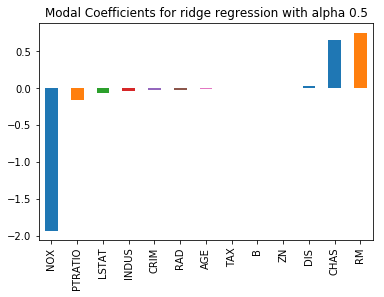

In [55]:
#ridge_regression
regr2=linear_model.Ridge(alpha=10, normalize=True)
regr2.fit(X_train,Y_train)
Y_pred=regr2.predict(X_test)
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f"% mean_squared_error(Y_test,Y_pred))
print("r-square : %f " %regr2.score(X_test,Y_test) )
predictors = X_train.columns
coef = Series(regr2.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients for ridge regression with alpha 0.5')
#we can see that, as we increase the value of alpha, the magnitude of the coefficients decreases, 
#where the values reaches to zero but not absolute zero , mean square error increases and also r-square value decrease ,
#So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.